**Инструкция по выполнению**

1. Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у датафрейма). В первой колонке файла с данными записано, была или нет реакция. Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. Разбейте выборку на обучающую и тестовую, используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241. 
2. Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 и для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:
    - Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой итерации.
    - Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}), где y_pred — предсказанное значение.
    - Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное значение метрики и номер итерации, на которой оно достигается.
3. Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: переобучение (overfitting) или недообучение (underfitting)? В ответе укажите одно из слов overfitting либо underfitting.

4. Приведите минимальное значение log-loss на тестовой выборке и номер итерации, на котором оно достигается, при learning_rate = 0.2.

5. На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c random_state=241 и остальными параметрами по умолчанию. Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что предсказания нужно получать с помощью функции predict_proba. В данном случае брать сигмоиду от оценки вероятности класса не нужно)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from copy import deepcopy
%matplotlib inline

1

In [2]:
data = pd.read_csv('gbm-data.csv')
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y = data['Activity']
X = deepcopy(data)
X.drop('Activity', axis = 1, inplace = True)
X = X.values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 241)

2

In [5]:
rates = [1, 0.5, 0.3, 0.2, 0.1]
losses = dict()
for rate in rates:
    model = GradientBoostingClassifier(n_estimators = 250, learning_rate = rate, verbose = True, random_state = 241)
    model.fit(X_train, y_train)
    loss_train  = [log_loss(y_train, y_pred) for y_pred in model.staged_predict_proba(X_train)]
    loss_test = [log_loss(y_test, y_pred) for y_pred in model.staged_predict_proba(X_test)]
    losses[rate] = [loss_train, loss_test]

      Iter       Train Loss   Remaining Time 
         1           1.0190           11.42s
         2           0.9192           10.76s
         3           0.8272           10.18s
         4           0.7834            9.81s
         5           0.7109            9.77s
         6           0.6368            9.82s
         7           0.5797            9.62s
         8           0.5610            9.47s
         9           0.5185            9.35s
        10           0.4984            9.24s
        20           0.1999            9.27s
        30           0.1313            9.16s
        40           0.0790            8.76s
        50           0.0511            8.17s
        60           0.0352            7.77s
        70           0.0245            7.27s
        80           0.0162            6.79s
        90           0.0114            6.33s
       100           0.0077            5.92s
       200           0.0002            1.99s
      Iter       Train Loss   Remaining Time 
        

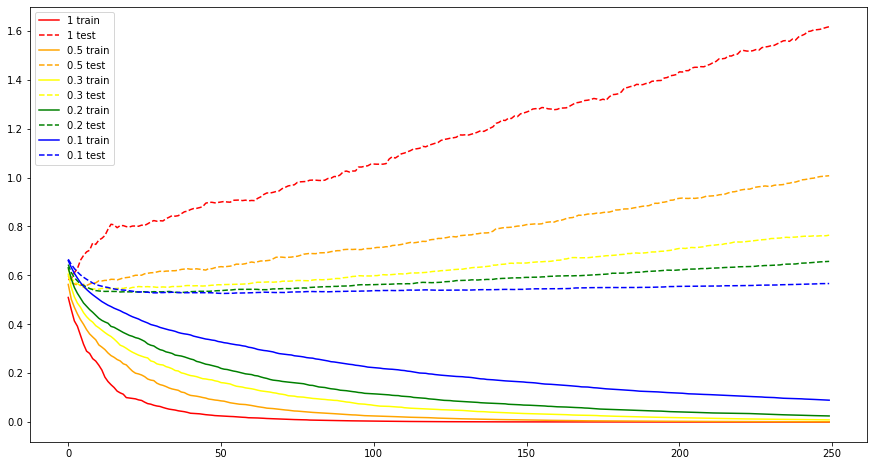

In [6]:
plt.figure(figsize=(15,8))
for name, color in [(1, 'red'), (0.5, 'orange'), (0.3, 'yellow'), (0.2, 'green'), (0.1, 'blue')]:
    plt.plot(losses[name][0], color = color, label = str(name) + ' train')
    plt.plot(losses[name][1], color = color, linestyle = 'dashed', label = str(name) + ' test')
plt.legend(loc='upper left')
plt.show()

3 Overfitting

4

In [7]:
round(min(losses[0.2][1]), 2)

0.53

In [8]:
i = np.argmin(losses[0.2][1])
i

36

5. На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c random_state=241 и остальными параметрами по умолчанию. Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что предсказания нужно получать с помощью функции predict_proba. В данном случае брать сигмоиду от оценки вероятности класса не нужно)

In [9]:
rnd = RandomForestClassifier(n_estimators=i+1, random_state = 241)
rnd.fit(X_train, y_train)
prediction_rnd = rnd.predict_proba(X_test)
round(log_loss(y_test, prediction_rnd[:, 1]), 2)

0.54